In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/DailyDelhiClimateTest.csv')

In [3]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [4]:
df = df[['date','meantemp']]

In [5]:
df.head()

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889


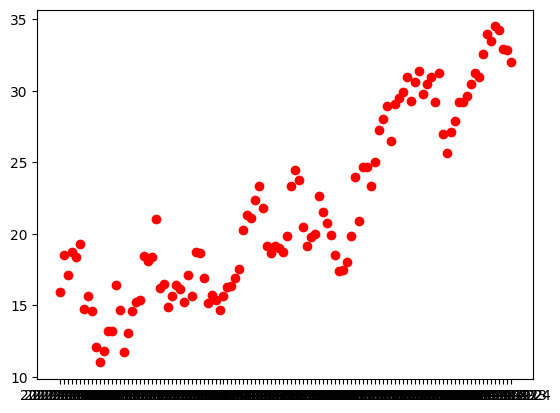

In [6]:
plt.scatter(df['date'],df['meantemp'],color='red')

In [9]:
x1 = df['meantemp'].ewm(alpha=0.9).mean() #alpha = 0.9 then beta = 1-0.9 = 0.1

In [10]:
x1

0      15.913043
1      18.264822
2      17.225443
3      18.552677
4      18.405266
         ...    
109    34.403401
110    34.265340
111    33.036534
112    32.891153
113    32.089115
Name: meantemp, Length: 114, dtype: float64

In [11]:
df['ewma'] = x1
df

,date,meantemp,ewma
0,2017-01-01,15.913043,15.913043
1,2017-01-02,18.500000,18.264822
2,2017-01-03,17.111111,17.225443
3,2017-01-04,18.700000,18.552677
4,2017-01-05,18.388889,18.405266
...,...,...,...
109,2017-04-20,34.500000,34.403401
110,2017-04-21,34.250000,34.265340
111,2017-04-22,32.900000,33.036534
112,2017-04-23,32.875000,32.891153


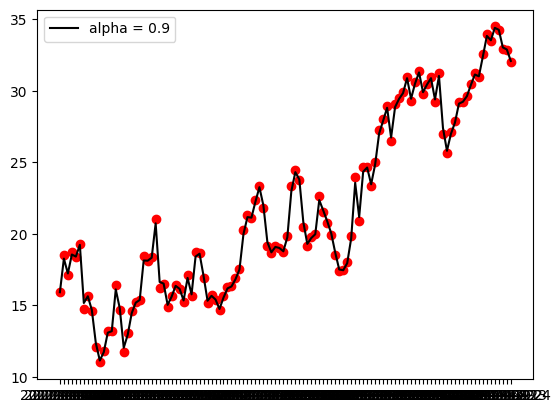

In [12]:
plt.scatter(df['date'],df['meantemp'],color='red')
plt.plot(df['date'],x1,color='black',label='alpha = 0.9')
plt.legend()
plt.show()

In [15]:
x2 = df['meantemp'].ewm(alpha=0.5).mean() #alpha = 0.5 then beta = 1-0.5 = 0.5

In [16]:
df['ewma'] = x2
df

,date,meantemp,ewma
0,2017-01-01,15.913043,15.913043
1,2017-01-02,18.500000,17.637681
2,2017-01-03,17.111111,17.336784
3,2017-01-04,18.700000,18.063833
4,2017-01-05,18.388889,18.231604
...,...,...,...
109,2017-04-20,34.500000,33.833047
110,2017-04-21,34.250000,34.041523
111,2017-04-22,32.900000,33.470762
112,2017-04-23,32.875000,33.172881


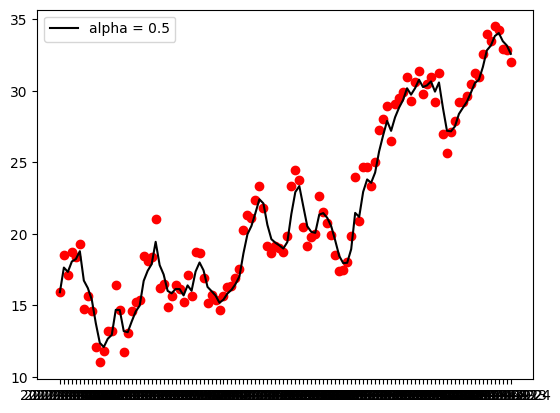

In [18]:
plt.scatter(df['date'],df['meantemp'],color='red')
plt.plot(df['date'],x2,color='black',label='alpha = 0.5')
plt.legend()
plt.show()

In [19]:
def calculate_ewma(data, alpha):
    """
    Calculate Exponentially Weighted Moving Average (EWMA) for a given dataset.

    Parameters:
    - data: List of numeric values.
    - alpha: Smoothing factor between 0 and 1.

    Returns:
    - ewma_values: List of EWMA values.
    """

    ewma_values = [data[0]]  # Initialize with the first value in the dataset

    for i in range(1, len(data)):
        ewma = alpha * data[i] + (1 - alpha) * ewma_values[-1]
        ewma_values.append(ewma)

    return ewma_values

# Example usage:
data = [10, 12, 15, 18, 20, 22, 25]
alpha = 0.2

ewma_result = calculate_ewma(data, alpha)
print("Original Data:", data)
print("EWMA Values:", ewma_result)


Original Data: [10, 12, 15, 18, 20, 22, 25]
EWMA Values: [10, 10.4, 11.32, 12.656, 14.1248, 15.699840000000002, 17.559872000000002]


In [42]:
df['ewma_result']= pd.DataFrame(calculate_ewma(df['meantemp'], alpha))
print("Original Data:", df['meantemp'])
print("EWMA Values:",df['ewma_result'])

Original Data: 0      15.913043
1      18.500000
2      17.111111
3      18.700000
4      18.388889
         ...    
109    34.500000
110    34.250000
111    32.900000
112    32.875000
113    32.000000
Name: meantemp, Length: 114, dtype: float64
EWMA Values: 0      15.913043
1      16.430435
2      16.566570
3      16.993256
4      17.272383
         ...    
109    32.177088
110    32.591670
111    32.653336
112    32.697669
113    32.558135
Name: ewma_result, Length: 114, dtype: float64
